# Segmentación de Especies con Cluster Analysis

El conjunto de datos de la flor **Iris** es uno de los más populares para el Aprendizaje de Máquina (ML).  Si no lo conocen, pueden leer sobre él en:

https://en.wikipedia.org/wiki/Iris_flower_data_set

El conjunto de datos *iris.csv* tiene cuatro variables:  

* **sepal length** (longitud del sépalo), 
* **sepal width** (ancho del sépalo), 
* **petal length** (longitud del pétalo), 
* **petal width** (ancho del pétalo).






In [360]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import sklearn.cluster as cluster
import kneed as kn
import sklearn.metrics as metrics
import sklearn.preprocessing as pp

In [361]:
# Lectura de archivo

irisData = pd.read_csv("iris.csv")

In [362]:
# Head

irisData.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [363]:
# Correlación
irisData.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [364]:
# Describir dataset
irisData.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

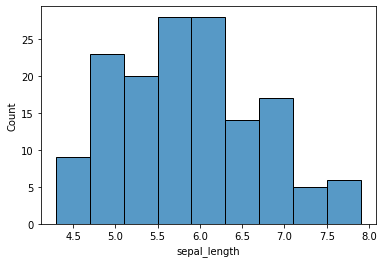

In [365]:
# EDA:

# Histograma de la longitud del sépalo:
sns.histplot(data=irisData, x="sepal_length", multiple="stack")

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

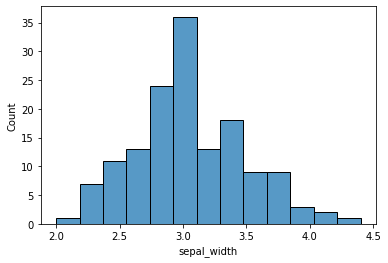

In [404]:
# Histograma del ancho del sépalo:
sns.histplot(data=irisData, x="sepal_width", multiple="stack")

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

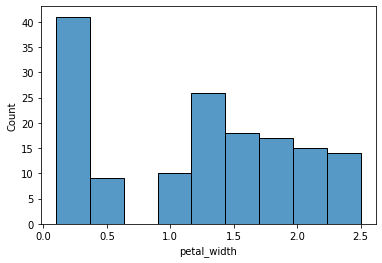

In [367]:
# Histograma de la longitud del pétalo:
sns.histplot(data=irisData, x="petal_width", multiple="stack")

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

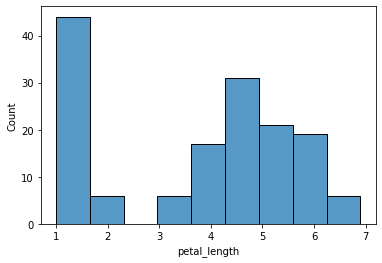

In [368]:
# Histograma del ancho del pétalo:
sns.histplot(data=irisData, x="petal_length", multiple="stack")

<AxesSubplot:xlabel='sepal_length'>

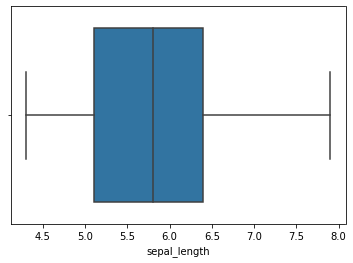

In [369]:
# Boxplot de la longitud del sépalo:
sns.boxplot(data=irisData, x="sepal_length")

<AxesSubplot:xlabel='sepal_width'>

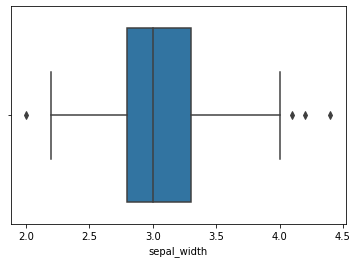

In [370]:
# Boxplot del ancho del sépalo:
sns.boxplot(data=irisData, x="sepal_width")

<AxesSubplot:xlabel='petal_width'>

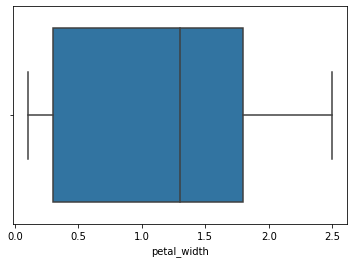

In [371]:
# Boxplot de la longitud del pétalo:
sns.boxplot(data=irisData, x="petal_width")

<AxesSubplot:xlabel='petal_length'>

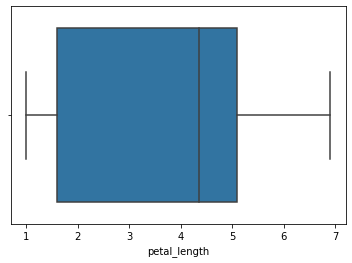

In [372]:
# Boxplot del ancho del pétalo:
sns.boxplot(data=irisData, x="petal_length")

<AxesSubplot:>

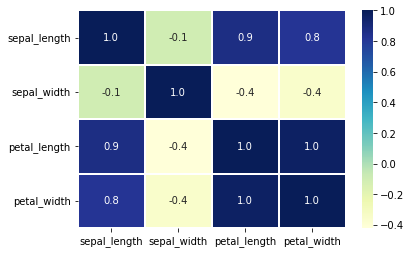

In [373]:
# Heatmap correlación de variables:

sns.heatmap(irisData.corr(), annot=True, cmap="YlGnBu", linewidths=0.2, annot_kws={"size": 10}, fmt=".1f")

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

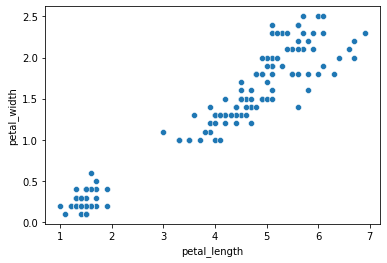

In [374]:
# Scatterplot de la longitud del pétalo vs el ancho del pétalo:

sns.scatterplot(data=irisData, x="petal_length", y="petal_width")

<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

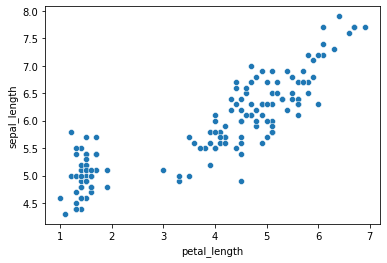

In [375]:
# Scatterplot de la longitud del petalo vs longitud del sépalo:
sns.scatterplot(data=irisData, x="petal_length", y="sepal_length")

<AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>

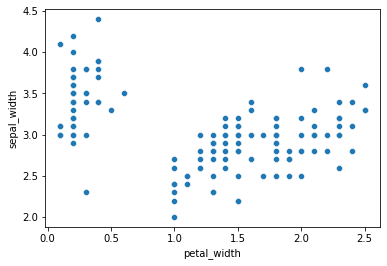

In [376]:
# Scatterplot de la ancho del petalo vs ancho del sepalo:
sns.scatterplot(data=irisData, x="petal_width", y="sepal_width")

<AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>

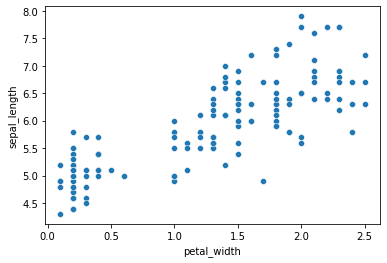

In [377]:
# Scatterplot de la ancho del petalo vs longitud del sepalo:
sns.scatterplot(data=irisData, x="petal_width", y="sepal_length")

<AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>

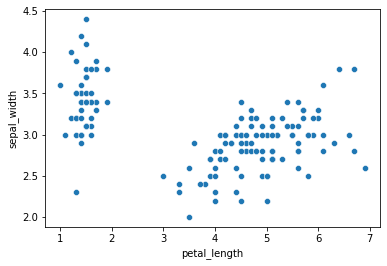

In [378]:
# Scatterplot de la largo del petalo vs ancho del sepalo:
sns.scatterplot(data=irisData, x="petal_length", y="sepal_width")

In [379]:
# Limpieza de datos nulos
if irisData.isnull().sum().sum() == 0:
    print("No hay valores nulos")
else:
    print("Hay valores nulos")
    irisData = irisData.dropna()

No hay valores nulos


In [380]:
# Limpieza de datos duplicados

if irisData.duplicated().sum() == 0:
    print("No hay valores duplicados")
else:
    print("Hay valores duplicados")
    irisData = irisData.drop_duplicates()

Hay valores duplicados


In [381]:
# 1.1 y 2.1
X = irisData[["sepal_length", "sepal_width"]].values
print(X.shape)

(147, 2)


**SECCIÓN 1:**

1. Visualicen los datos para ver si pueden detectar algunos grupos. **Ayuda:**   utilicen la forma del sépalo:

2. Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.  

3. Estandaricen los datos e intenten el paso 2, de nuevo.  ¿Qué diferencias hay, si es que lo hay?

4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)

5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

6. Comparen sus soluciones con los datos reales, archivo: *iris-con-respuestas.csv*

**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

¿Funcionó el clustering con la forma del sépalo?

#### 1.1. Visualicen los datos para ver si pueden detectar algunos grupos. **Ayuda:**   utilicen la forma del sépalo:

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

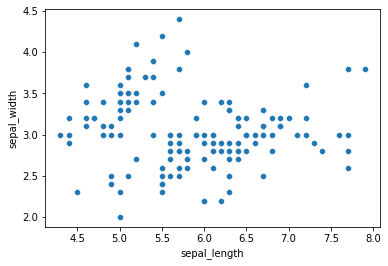

In [382]:
# Scatterplot de la longitud del sépalo vs el ancho del sépalo:

sns.scatterplot(data=irisData, x="sepal_length", y="sepal_width")

In [383]:
# Se eligen las variables con mayor correlación (sépalo)

correlacion = irisData['sepal_length'].corr(irisData['sepal_width'])
X = irisData[["sepal_length", "sepal_width"]].values

#### 1.2.Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.

In [384]:
K_Means = cluster.KMeans(n_clusters=2)
K_Means.fit(X)
Labels = K_Means.predict(X)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

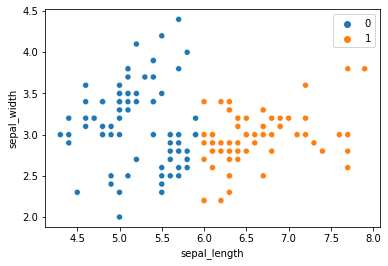

In [385]:
sns.scatterplot(data=irisData, x="sepal_length", y="sepal_width", hue=Labels)

#### 3. Estandaricen los datos e intenten el paso 2, de nuevo.  ¿Qué diferencias hay, si es que lo hay?

In [386]:
Escalador = pp.StandardScaler()
X = Escalador.fit_transform(X)

K_Means = cluster.KMeans(n_clusters=2)
K_Means.fit(X)
Labels = K_Means.predict(X)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

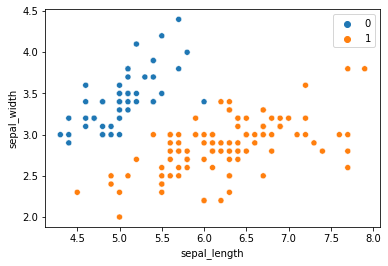

In [387]:
sns.scatterplot(data=irisData, x="sepal_length", y="sepal_width", hue=Labels)

Cuando se estandariza la data, se observa una clara división de datos en comparación con los datos sin estandarizar. 

#### 4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)

In [388]:
distancia = [cluster.KMeans(n_clusters=i).fit(X).inertia_ for i in range(1, 11)]
K = np.arange(1, 11)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

<AxesSubplot:>

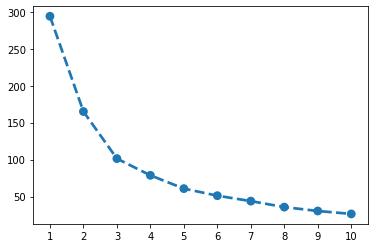

In [389]:
sns.pointplot(x=K, y=distancia, markers='o', linestyles='--')

#### 5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

In [390]:
cluster_two = cluster.KMeans(n_clusters=2)
cluster_two.fit(X)
cluster_two_prediction = cluster_two.predict(X)
cluster_two_prediction

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

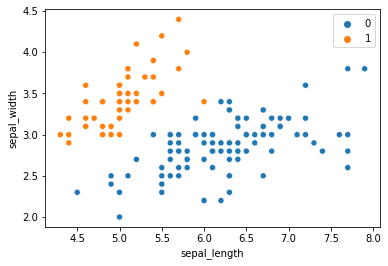

In [414]:
sns.scatterplot(data=irisData, x="sepal_length", y="sepal_width", hue=cluster_two_prediction)

In [391]:
cluster_two_data = irisData.copy()
cluster_two_data['Cluster'] = cluster_two_prediction
cluster_two_data

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [392]:
cluster_three = cluster.KMeans(n_clusters=3)
cluster_three.fit(X)
cluster_three_prediction = cluster_three.predict(X)
cluster_three_prediction

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
sns.scatterplot(data=irisData, x="sepal_length", y="sepal_width", hue=cluster_three_prediction)

In [393]:
cluster_three_data = irisData.copy()
cluster_three_data['Cluster'] = cluster_three_prediction
cluster_three_data

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


####  6. Comparen sus soluciones con los datos reales, archivo: *iris-con-respuestas.csv*

**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

¿Funcionó el clustering con la forma del sépalo?

**Sección 2:**

Repitan el proceso pero ahora utilizando la forma del pétalo.  Respondan a las mismas preguntas

1. Visualicen los datos para ver si pueden detectar algunos grupos. **Ayuda:**   utilicen la forma del sépalo:

2. Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.  

3. Estandaricen los datos e intenten el paso 2, de nuevo.  ¿Qué diferencias hay, si es que lo hay?

4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)

5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

6. Comparen sus soluciones con los datos reales, archivo: *iris-con-respuestas.csv*

**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

¿Funcionó el clustering con la forma del sépalo?

#### 1. Visualicen los datos para ver si pueden detectar algunos grupos. **Ayuda:**   utilicen la forma del petalo:

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

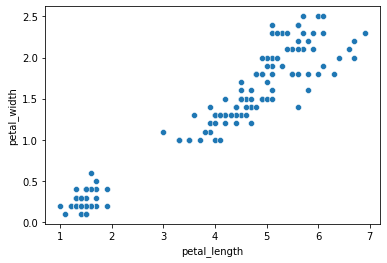

In [394]:
# Scatterplot de la longitud del sépalo vs el ancho del sépalo:

sns.scatterplot(data=irisData, x="petal_length", y="petal_width")

In [395]:
# Se eligen las variables con mayor correlación (sépalo)

correlacion = irisData['petal_length'].corr(irisData['petal_width'])
X = irisData[["petal_length", "petal_width"]].values

#### 2.Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.

In [396]:
K_Means = cluster.KMeans(n_clusters=2)
K_Means.fit(X)
Labels = K_Means.predict(X)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### 3. Estandaricen los datos e intenten el paso 2, de nuevo.  ¿Qué diferencias hay, si es que lo hay?

In [397]:
Escalador = pp.StandardScaler()
X = Escalador.fit_transform(X)

K_Means = cluster.KMeans(n_clusters=2)
K_Means.fit(X)
Labels = K_Means.predict(X)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

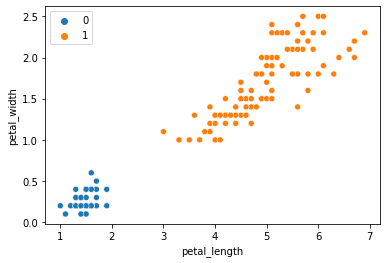

In [398]:
sns.scatterplot(data=irisData, x="petal_length", y="petal_width", hue=Labels)

Se observa que al momento que se estandariza la data, es mucho más clara la división de datos. Es bastante sútil la diferencia, sin embargo hay una mejor separación de los datos.

#### 4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)

In [399]:
distancia = [cluster.KMeans(n_clusters=i).fit(X).inertia_ for i in range(1, 11)]
K = np.arange(1, 11)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

<AxesSubplot:>

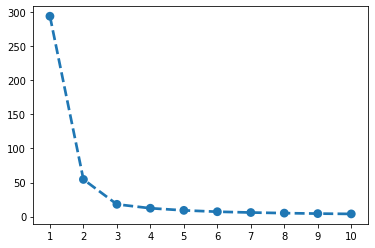

In [400]:
sns.pointplot(x=K, y=distancia, markers='o', linestyles='--')

#### 5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

####  6. Comparen sus soluciones con los datos reales, archivo: *iris-con-respuestas.csv*

**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

¿Funcionó el clustering con la forma del sépalo?


**Sección 3:**

Utilicen la librería "kneed" y vean si el resultado coincide con el método del "codo" que hicieron manualmente.  ¿A que podría deberse la diferencia, si la hay?  ¿Les dió el número correcto de clusters, comparado a los datos reales?  

Basado en los resultado que tuvieron, ¿A qué conclusiones llegaron?

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

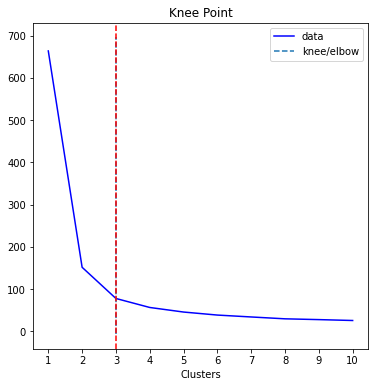

In [412]:

K = range(1, 11)
inertias = [cluster.KMeans(n_clusters=i).fit(irisData.values).inertia_ for i in K]
kn1 = kn.KneeLocator(K, inertias, curve='convex', direction='decreasing')
kn1.plot_knee()
plt.xlabel('Clusters')
plt.xticks(K)
plt.axvline(x=kn1.knee, linestyle='--', color='red')


In [402]:
# Metricas de desempeño:

print("El número óptimo de clusters es: ", kn1.knee)
print("La inercia es: ", inertias[kn1.knee-1])


El número óptimo de clusters es:  3
La inercia es:  18.03573391109313


Al utilizar la librería kneed con un set de datos de iris flor, se determinó que el número óptimo de clusters es 3. Esto coincide con lo buscado debido a que, en el archivo iris-con-respuestas.csv, se tiene 3 especies de iris flor. Así que se puede concluir que utilizar la librería resulta bastante eficiente para encontrar el número óptimo de clusters.
Se recomienda para futuras iteraciones, hacer el ejercicio de comparar el método del codo con la librería kneed, para ver si el resultado es el mismo o no. De ser así, se puede concluir que la librería es bastante eficiente para encontrar el número óptimo de clusters.

Entonces, resumiendo lo antes mencionado podemos decir lo siguiente:

- Nos dio el número correcto de clusters comparado a los datos reales debido a que se tuvo 3 clusters, lo cual coincide con el número de especies de iris flor.
- Como conclusión podemos decir que, al seleccionar la cantidad correcta de clusters ayuda muchísimo a obtener buenos resultados en el análisis de los clustering.
- Los resultados obtenidos con la librería kneed fueron bastante eficientes para encontrar el número óptimo de clusters.
- Basado en los datos, el número óptimo de clusters es 3, determinado con la librería kneed, teniendo un valor de inercia de 18.036.
